## Logistics Regression

#### Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is binary in nature. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

![Sandip](https://miro.medium.com/max/850/0*IxhjOPy-4QY33MiH.png)


#### <font color = 'Maroon'> Definition :</font>  <font color = 'blue'>A Multiclass logistic regression is a classification method that generalizes logistic regression to multiclass problems, i.e. with more than two possible discrete outcomes.</font>

## Approach :

### <font color='blue'> Let's implement multiclass logistic regression on data produced by Cardiotocograph.

#### Cardiotocography (CTG) is a technical means of recording the fetal heartbeat and the uterine contractions during pregnancy. The machine used to perform the monitoring is called a cardiotocograph, more commonly known as an electronic fetal monitor (EFM).

#### Here are the attributes from the dataset which will help Nodel to predict value of NSP.
    
##### <font color = 'maroon'>LB — FHR baseline (beats per minute)<br>AC — # of accelerations per second<br>FM — # of fetal movements per second<br>UC — # of uterine contractions per second<br>DL — # of light decelerations per second<br>DS — # of severe decelerations per second<br>DP — # of prolongued decelerations per second<br>ASTV — percentage of time with abnormal short term variability<br>MSTV — mean value of short term variability<br>ALTV — percentage of time with abnormal long term variability<br>MLTV — mean value of long term variability<br>Width — width of FHR histogram<br>Min — minimum of FHR histogram<br>Max — Maximum of FHR histogram<br>Nmax — # of histogram peaks<br>Nzeros — # of histogram zeros<br>Mode — histogram mode<br>Mean — histogram mean<br>Median — histogram median<br>Variance — histogram variance<br>Tendency — histogram tendency<br>CLASS — FHR pattern class code (1 to 10)<br>NSP — fetal state class code (N=normal; S=suspect; P=pathologic)<br></font>


### <font color='green'> Aim : After taking into consideration all the parameters our classifier will predict the fetal state class code(NSP). NSP has 3 classes namely 
<font color = 'Green'>N=Normal</font>; 
<font color = 'orange'>S=Suspect</font>; 
<font color = 'dark pink'>P=Pathologic</font></font>

In [1]:
import time

start = time.process_time()

#  Import all the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset and check

# Download dataset from https://archive.ics.uci.edu/ml/datasets/cardiotocography

CTG_Dataset = pd.read_excel("E:\\Kaggle & ML Projects\\Data Science - ML Models\\Supervised\\Classification problem\\Algorithms\\Logistic Regrression\\CTG.xls",sheet_name="Raw Data")
CTG_Dataset.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [3]:
#  CTG_Dataset.shape returns the number of rows and columns. For this case, there are 673 rows and 18 columns.

CTG_Dataset.shape

(2129, 40)

In [4]:
# Drop irrelevant columns.

CTG_Dataset.drop(columns=['FileName', 'SegFile', 'Date'])

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,74.0,0.4,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Final_CTG_Dataset = CTG_Dataset.dropna()
Final_CTG_Dataset.shape

(2126, 40)

In [6]:
# Check for null values anywhere in our dataset. If you have zero values for all the columns then it meant we don’t have 
# any null value in any of the columns.

Final_CTG_Dataset.isnull().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [7]:
# CTG_Dataset.isnull().values.any()
Final_CTG_Dataset.isnull().values.any()

False

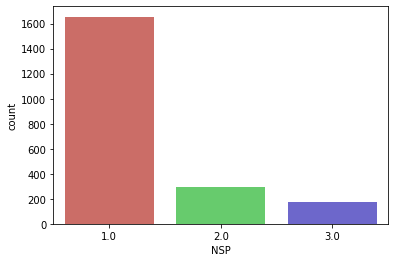

In [8]:
# Explore the target data and visualize it.

sns.countplot(x = 'NSP', data = Final_CTG_Dataset, palette = 'hls')
plt.show()

In [9]:
# Divide the given data into two types of variables dependent(or target variable) and 
# independent variable(or feature variables).

# Dependent variable

X = Final_CTG_Dataset[['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV','DL', 'DS', 'DP', 'DR', 
                 'Width', 'Min', 'Max', 'Nmax','Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 
                 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']]
# Independent variable

y = Final_CTG_Dataset['NSP']

In [10]:
# Now we split 75% of the data to training set while 25% of the data to test set using below code.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1488, 36), (1488,), (638, 36), (638,))

## Train the Model

In [12]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict using Model

In [13]:
# Now that we have trained our algorithm, it’s time to make some predictions. We do the prediction on test data

y_pred = logreg.predict(X_test)

In [14]:
# # Collate all data in DataFrame

# df = pd.DataFrame(X_test) 
# df["Actua Y - NSP"] = y_test
# df["Predicted Y - NSP"] = y_pred

## Have a look of Predited & Actual value of 'Y'

In [15]:
# df
# df.drop

## Model Evaluation using Confusion Matrix

In [16]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[474,   7,  13],
       [ 37,  44,   5],
       [  4,  11,  43]], dtype=int64)

## Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

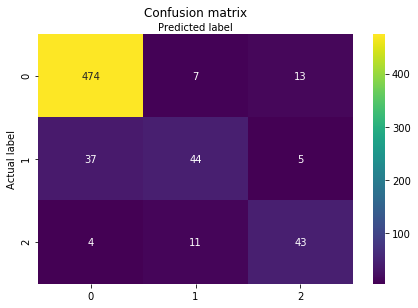

In [17]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics

#### Well, our binary classification model predicted the outcome with 85.71% accuracy which is considered as good.

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8793103448275862


## ROC Curve

#### ROC(Receiver Operating Characteristic) curve is a plot of the true positive rate(Recall) against the false positive rate. 

#### AUC(Area Under Curve) score for the case is 0.81. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

In [19]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

print(f'Time consumed to execute complete code : {time.process_time() - start}')

Area under curve :  0.8106926644548401
Time consumed to execute complete code : 2.390625


## Thank You!   Next --->


## ---- Assosiation Rule Mining ----